<a href="https://colab.research.google.com/github/NsikakMenim/Data-Analysis-Portfolio/blob/main/marketing_campaign_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
#----------------------------
# Helper Functions
#----------------------------

def load_marketing_data(url: str) -> pd.DataFrame:
    """
    Loads marketing data from a Google Sheets URL.
    Args:
        url (str): The shared Google Sheets URL.
    Returns:
        pd.DataFrame: The loaded dataframe.
    """
    # Convert shared URL for CSV export
    csv_url = url.replace("/edit?gid=", "/export?format=csv&gid=")
    try:
        df = pd.read_csv(csv_url)
    except Exception as e:
        print(f"Error loading data: {e}")
        df = pd.DataFrame()
    return df

def detect_outliers(df: pd.DataFrame, field: str) -> pd.DataFrame:
    """
    Detects outliers in a numerical column using the IQR method.
    Args:
        df (pd.DataFrame): The dataframe.
        field (str): The column to check.
    Returns:
        pd.DataFrame: A dataframe containing outlier rows.
    """
    Q1 = df[field].quantile(0.25)
    Q3 = df[field].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[field] < lower_bound) | (df[field] > upper_bound)]
    print(f"Outliers in {field}:\n{outliers[[field]]}\n")
    return outliers

def add_values(ax):
    """
    Adds the numerical value on top of each bar in a barplot.
    """
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

def plot_bar(data, x, y, palette, title, xlabel, ylabel, rotation=0, figsize=(12,6)):
    """
    Plots a bar chart using seaborn and annotates values.
    """
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=data, x=x, y=y, palette=palette, estimator=lambda x: x.mean())
    add_values(ax)
    plt.xticks(rotation=rotation, ha="right")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()



In [55]:
#----------------------------
# Main Code Execution
#----------------------------


In [56]:

# Load data
data_url = "https://docs.google.com/spreadsheets/d/1LBGqmX9jT6HuJwHrVZXjIKPxqElkYFPg/edit?gid=751358393#gid=751358393"
df = load_marketing_data(data_url)


In [57]:
# Initial Data Checks
print(df.isnull().sum())
df.info()
print(df.describe(include='all'))


Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Date                0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  object 
 8   ROI               200005 non-null  float64
 9   Location     

In [58]:
# Unique Values in Target_Audience and Channel_Used
print("Unique Target Audiences:", df['Target_Audience'].unique())
print("Unique Marketing Channels:", df['Channel_Used'].unique())


Unique Target Audiences: ['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']
Unique Marketing Channels: ['Google Ads' 'YouTube' 'Instagram' 'Website' 'Facebook' 'Email']


In [59]:

# Outlier Detection for numerical fields
for field in ['Impressions', 'Clicks']:
    detect_outliers(df, field)


Outliers in Impressions:
Empty DataFrame
Columns: [Impressions]
Index: []

Outliers in Clicks:
Empty DataFrame
Columns: [Clicks]
Index: []



In [60]:
# Data Transformation
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# convert the Acquisition cost to float and handle errors
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')

# Convert the Duration to Integer
df['Duration'] = df['Duration'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Re-check data info after transformations
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200005 non-null  int64         
 1   Company           200005 non-null  object        
 2   Campaign_Type     200005 non-null  object        
 3   Target_Audience   200005 non-null  object        
 4   Duration          200005 non-null  int64         
 5   Channel_Used      200005 non-null  object        
 6   Conversion_Rate   200005 non-null  float64       
 7   Acquisition_Cost  200005 non-null  float64       
 8   ROI               200005 non-null  float64       
 9   Location          200005 non-null  object        
 10  Date              200005 non-null  datetime64[ns]
 11  Clicks            200005 non-null  int64         
 12  Impressions       200005 non-null  int64         
 13  Engagement_Score  200005 non-null  int64         
 14  Cust

In [61]:
# Feature Engineering: Calculating Metrics
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100
df['CPC'] = df['Acquisition_Cost'] / df['Clicks']


In [62]:

# Extract Date Components
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()


In [63]:

# Split 'Target_Audience' into Sex and Age Range
df[['Target_Audience_Sex', 'Target_Audience_Age_Range']] = df['Target_Audience'].str.split(' ', n=1, expand=True)
df.loc[df['Target_Audience_Age_Range'] == 'All Ages', 'Target_Audience_Sex'] = 'Both'
df.loc[df['Target_Audience_Age_Range'] == 'All Ages', 'Target_Audience_Age_Range'] = 'All Ages'
df = df.drop(['Date', 'Target_Audience'], axis=1)


In [64]:

# Outlier Detection for Acquisition_Cost
detect_outliers(df, 'Acquisition_Cost')


Outliers in Acquisition_Cost:
Empty DataFrame
Columns: [Acquisition_Cost]
Index: []



,Campaign_ID,Company,Campaign_Type,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Clicks,Impressions,Engagement_Score,Customer_Segment,CTR,CPC,Day,Month,Target_Audience_Sex,Target_Audience_Age_Range


In [65]:

# Grouping Data for Analysis: Campaign Performance
channel_performance = df.groupby('Channel_Used').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversion_Rate': 'mean',
    'CTR': 'mean',
    'CPC': 'mean'
})
print("Channel Performance:\n", channel_performance)


Channel Performance:
               Impressions    Clicks  Conversion_Rate        CTR        CPC
Channel_Used                                                              
Email           184801107  18493963         0.080282  14.054269  31.881471
Facebook        180662496  18038175         0.079990  14.049724  32.129366
Google Ads      185020154  18342589         0.080181  13.918943  32.308459
Instagram       183738455  18316654         0.079886  14.003691  32.080786
Website         183815901  18415351         0.080182  14.096941  31.779148
YouTube         183450845  18350935         0.079890  14.119755  31.872904


In [66]:

# Visualization: ROI Analysis


<ipython-input-54-52946093f5f9>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, palette=palette, estimator=lambda x: x.mean())


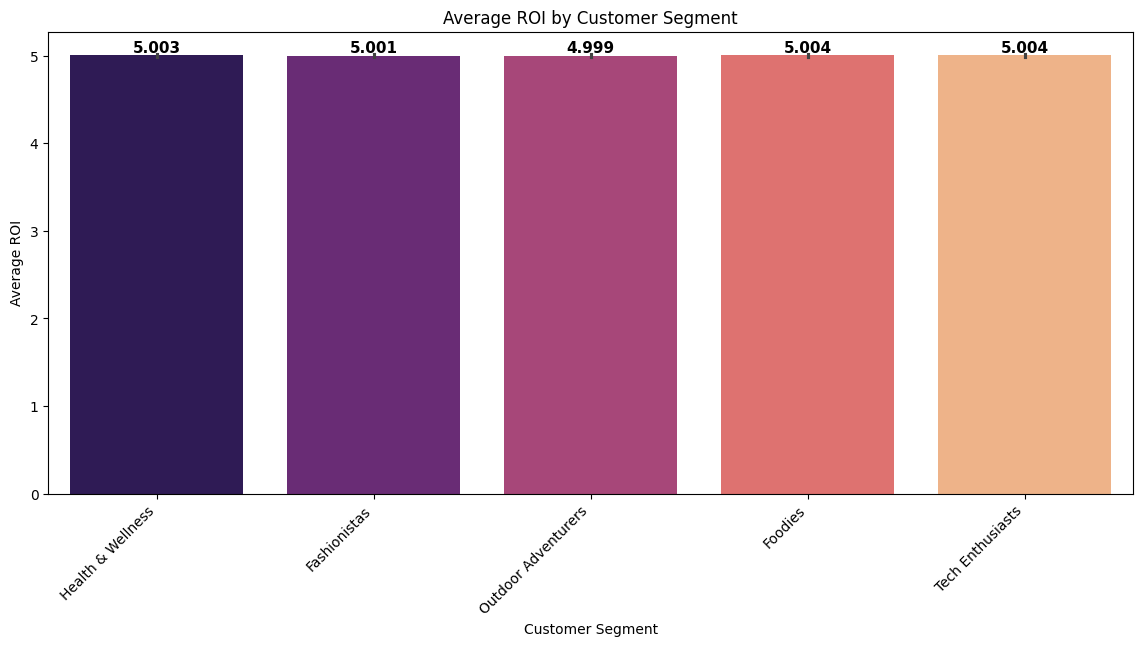

In [67]:
# Plot Average ROI by Customer Segment
plot_bar(data=df, x="Customer_Segment", y="ROI",
         palette="magma",
         title="Average ROI by Customer Segment",
         xlabel="Customer Segment", ylabel="Average ROI",
         rotation=45, figsize=(14,6))


<ipython-input-54-52946093f5f9>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, palette=palette, estimator=lambda x: x.mean())


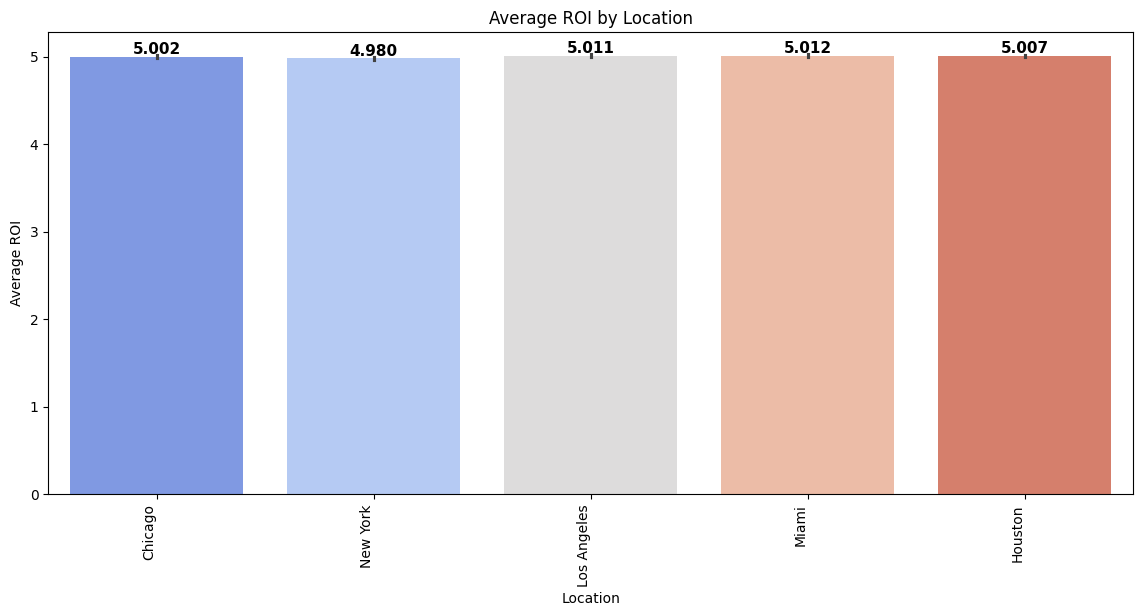

In [68]:

# Plot Average ROI by Location
plot_bar(data=df, x="Location", y="ROI",
         palette="coolwarm",
         title="Average ROI by Location",
         xlabel="Location", ylabel="Average ROI",
         rotation=90, figsize=(14,6))


<ipython-input-54-52946093f5f9>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, palette=palette, estimator=lambda x: x.mean())


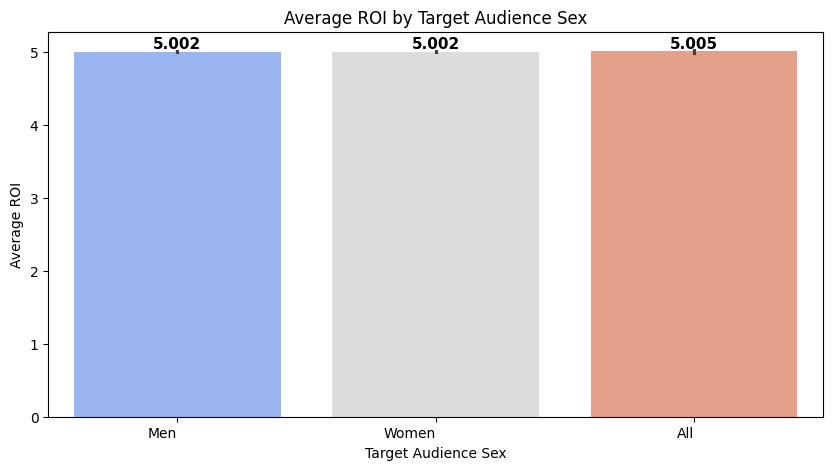

In [69]:

# Plot Average ROI by Target Audience Sex
plot_bar(data=df, x="Target_Audience_Sex", y="ROI",
         palette="coolwarm",
         title="Average ROI by Target Audience Sex",
         xlabel="Target Audience Sex", ylabel="Average ROI",
         rotation=0, figsize=(10,5))


<ipython-input-54-52946093f5f9>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, palette=palette, estimator=lambda x: x.mean())


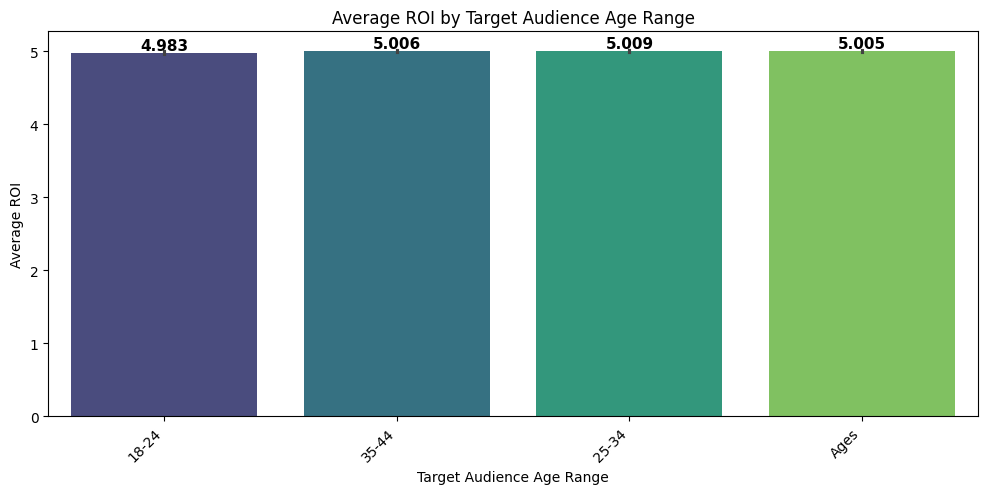

In [70]:

# Plot Average ROI by Target Audience Age Range
plot_bar(data=df, x="Target_Audience_Age_Range", y="ROI",
         palette="viridis",
         title="Average ROI by Target Audience Age Range",
         xlabel="Target Audience Age Range", ylabel="Average ROI",
         rotation=45, figsize=(12,5))


In [71]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)


<ipython-input-76-7002200f3d3a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends = df.groupby('Month')[['CTR', 'ROI']].mean().reset_index()


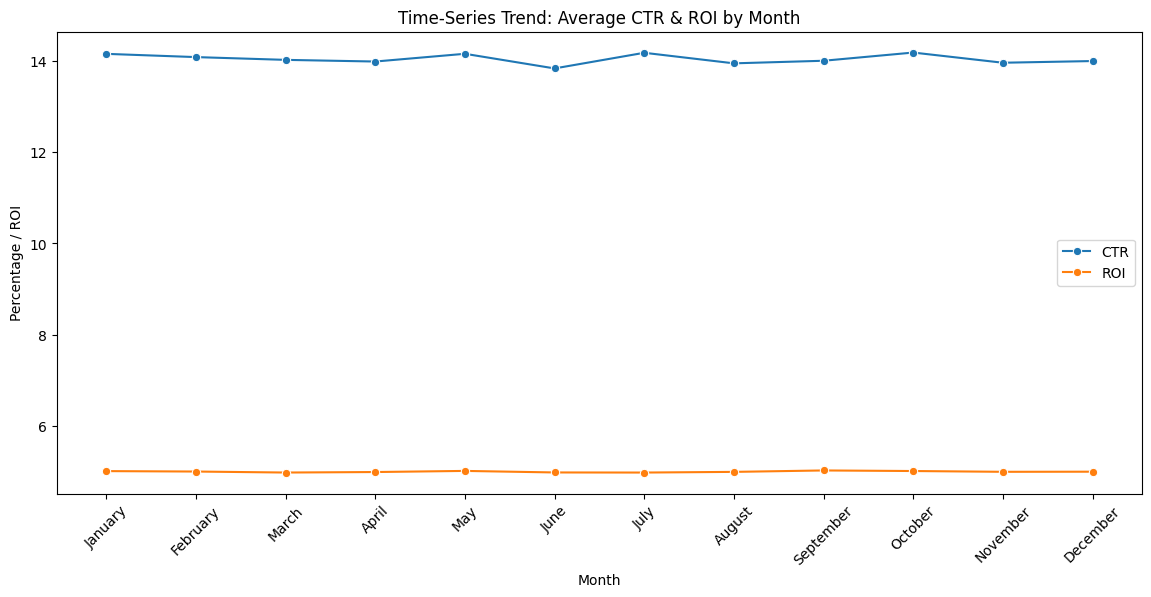

In [76]:
# Time-Series Trend: Average CTR & ROI by Month
# Group by month and compute the mean for selected KPIs
# Include only numerical columns in the mean calculation
monthly_trends = df.groupby('Month')[['CTR', 'ROI']].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trends, x='Month', y='CTR', marker="o", label="CTR")
sns.lineplot(data=monthly_trends, x='Month', y='ROI', marker="o", label="ROI")
plt.title("Time-Series Trend: Average CTR & ROI by Month")
plt.xlabel("Month")
plt.ylabel("Percentage / ROI")
plt.xticks(rotation=45)
plt.legend()
plt.show()

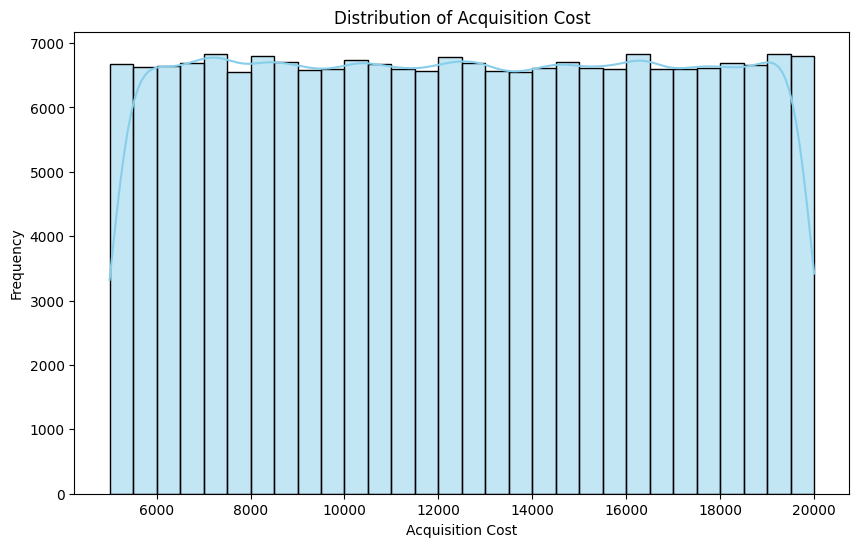

In [73]:

# Distribution Analysis: Histogram and Density Plot for Acquisition_Cost
plt.figure(figsize=(10,6))
sns.histplot(df['Acquisition_Cost'].dropna(), kde=True, color='skyblue', bins=30)
plt.title("Distribution of Acquisition Cost")
plt.xlabel("Acquisition Cost")
plt.ylabel("Frequency")
plt.show()


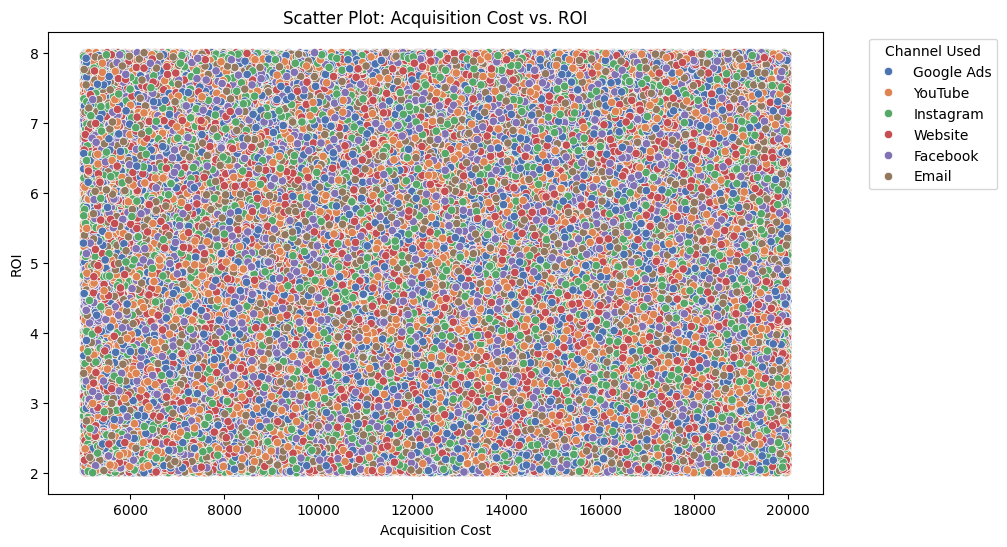

In [74]:

# Scatter Plot: Relationship Between Acquisition_Cost and ROI
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Acquisition_Cost', y='ROI', hue='Channel_Used', palette='deep')
plt.title("Scatter Plot: Acquisition Cost vs. ROI")
plt.xlabel("Acquisition Cost")
plt.ylabel("ROI")
plt.legend(title="Channel Used", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



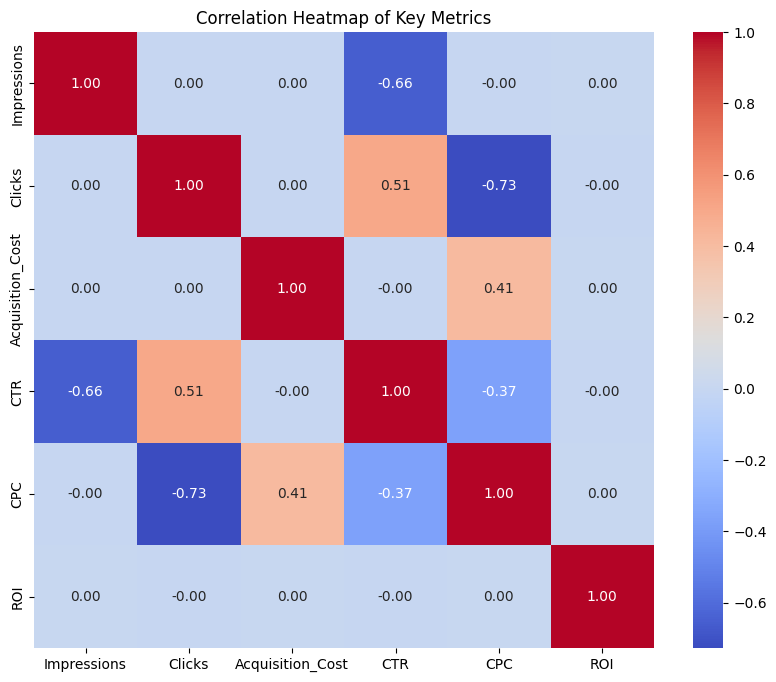

In [75]:

# Correlation Heatmap: Key Numerical Features
# Select only numerical columns that are key to your analysis
numerical_features = df[['Impressions', 'Clicks', 'Acquisition_Cost', 'CTR', 'CPC', 'ROI']]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Metrics")
plt.show()